# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import datetime
import scipy.stats as st
from scipy.stats import linregress
from pprint import pprint

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 593


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
#https://api.openweathermap.org/data/2.5/weather?q={city name}&appid={API key}

# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?q={city}&appid={weather_api_key}&units=imperial"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url)
        print (city_weather)
        print(city_weather.status_code)
        city_weather_dict = city_weather.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather_dict["coord"]["lat"]
        city_lng = city_weather_dict["coord"]["lon"]
        city_max_temp = city_weather_dict["main"]["temp_max"]
        city_humidity =  city_weather_dict["main"]["humidity"]
        city_clouds = city_weather_dict["clouds"]["all"]
        city_wind = city_weather_dict["wind"]["speed"]
        city_country = city_weather_dict["sys"]["country"]
        city_date_ts = city_weather_dict["dt"]
        city_date = datetime.utcfromtimestamp(city_date_ts)

        # # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")



Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | olonkinbyen
<Response [200]>
200
Processing Record 2 of Set 1 | invercargill
<Response [200]>
200
Processing Record 3 of Set 1 | axim
<Response [200]>
200
Processing Record 4 of Set 1 | port mathurin
<Response [200]>
200
Processing Record 5 of Set 1 | kapuskasing
<Response [200]>
200
Processing Record 6 of Set 1 | kyshtovka
<Response [200]>
200
Processing Record 7 of Set 1 | labrador city
<Response [200]>
200
Processing Record 8 of Set 1 | longyearbyen
<Response [200]>
200
Processing Record 9 of Set 1 | grytviken
<Response [200]>
200
Processing Record 10 of Set 1 | tralee
<Response [200]>
200
Processing Record 11 of Set 1 | papatowai
<Response [200]>
200
Processing Record 12 of Set 1 | hailar
<Response [200]>
200
Processing Record 13 of Set 1 | smithers
<Response [200]>
200
Processing Record 14 of Set 1 | yoichi
<Response [200]>
200
Processing Record 15 of Set 1 | blackmans bay
<Response [200]>
2

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          571
Lat           571
Lng           571
Max Temp      571
Humidity      571
Cloudiness    571
Wind Speed    571
Country       571
Date          571
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,olonkinbyen,70.9221,-8.7187,43.16,100,100,9.01,SJ,2023-08-09 23:45:25
1,invercargill,-46.4000,168.3500,43.02,85,89,4.00,NZ,2023-08-09 23:45:25
2,axim,4.8699,-2.2405,75.54,85,95,10.85,GH,2023-08-09 23:45:25
3,port mathurin,-19.6833,63.4167,72.30,71,0,15.30,MU,2023-08-09 23:45:25
4,kapuskasing,49.4169,-82.4331,73.49,60,75,6.91,CA,2023-08-09 23:45:26


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("/Users/mayraterrazas/UCI-Folder/Starter_Code 10/python-api-challenge/output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,olonkinbyen,70.9221,-8.7187,43.16,100,100,9.01,SJ,2023-08-09 23:45:25
1,invercargill,-46.4000,168.3500,43.02,85,89,4.00,NZ,2023-08-09 23:45:25
2,axim,4.8699,-2.2405,75.54,85,95,10.85,GH,2023-08-09 23:45:25
3,port mathurin,-19.6833,63.4167,72.30,71,0,15.30,MU,2023-08-09 23:45:25
4,kapuskasing,49.4169,-82.4331,73.49,60,75,6.91,CA,2023-08-09 23:45:26


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

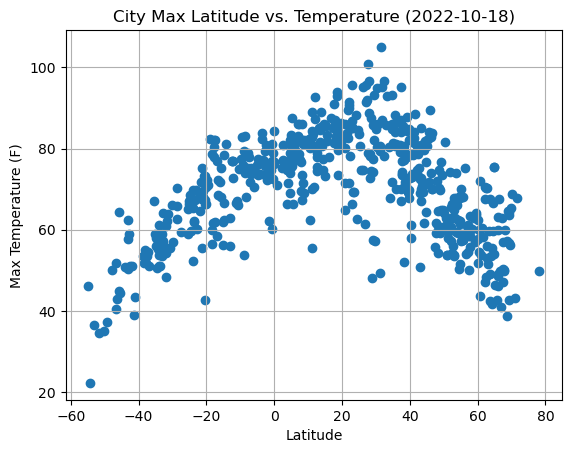

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"])


# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("City Max Latitude vs. Temperature (2022-10-18)")
plt.grid(True)

# Save the figure
plt.savefig("/Users/mayraterrazas/UCI-Folder/Starter_Code 10/python-api-challenge/output_data/Fig.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

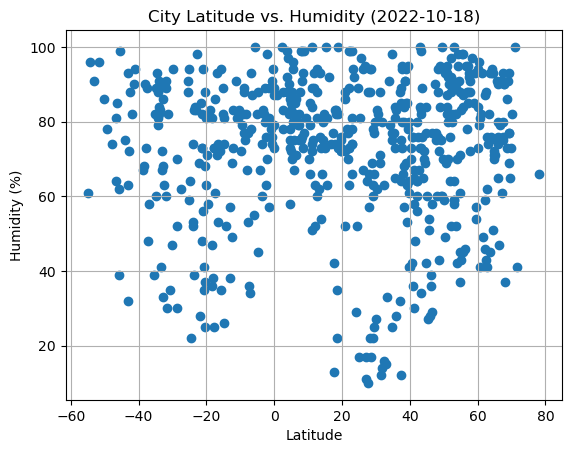

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"]) 

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (2022-10-18)")
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

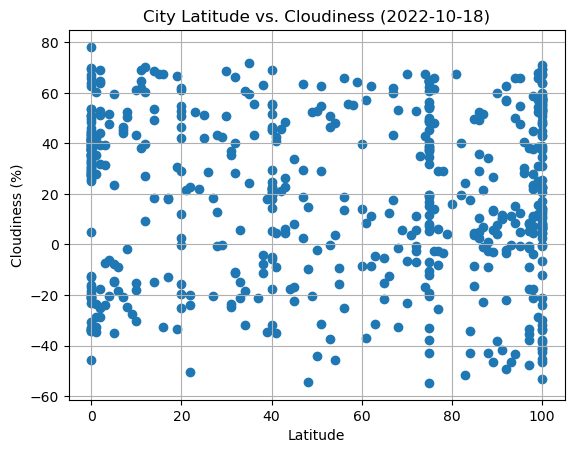

In [10]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Cloudiness"], city_data_df["Lat"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (2022-10-18)")
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show() 

#### Latitude vs. Wind Speed Plot

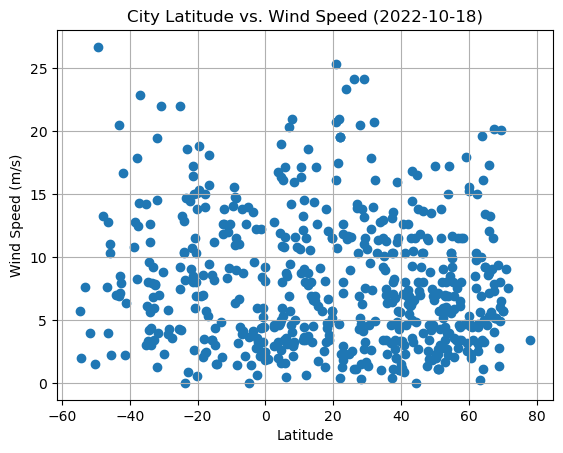

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs. Wind Speed (2022-10-18)")
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


The r-value is: 0.0413453041125973


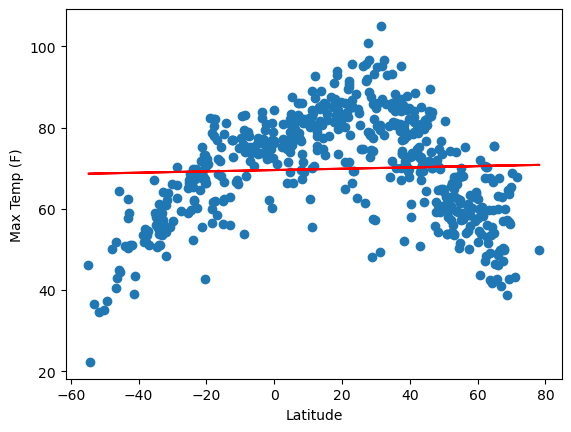

In [13]:
# Define a function to create Linear Regression plots
x_values = city_data_df["Lat"]
y_values = city_data_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (-40,260), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
print(f"The r-value is: {rvalue}")
plt.show()

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,olonkinbyen,70.9221,-8.7187,43.16,100,100,9.01,SJ,2023-08-09 23:45:25
2,axim,4.8699,-2.2405,75.54,85,95,10.85,GH,2023-08-09 23:45:25
4,kapuskasing,49.4169,-82.4331,73.49,60,75,6.91,CA,2023-08-09 23:45:26
5,kyshtovka,56.5550,76.6271,54.14,95,100,7.54,RU,2023-08-09 23:45:26
6,labrador city,52.9463,-66.9114,53.51,100,100,6.91,CA,2023-08-09 23:45:26


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,invercargill,-46.4000,168.3500,43.02,85,89,4.00,NZ,2023-08-09 23:45:25
3,port mathurin,-19.6833,63.4167,72.30,71,0,15.30,MU,2023-08-09 23:45:25
8,grytviken,-54.2811,-36.5092,22.28,96,48,1.95,GS,2023-08-09 23:45:27
10,papatowai,-46.5619,169.4708,40.59,81,93,7.58,NZ,2023-08-09 23:45:29
14,blackmans bay,-43.0167,147.3167,57.72,63,88,8.48,AU,2023-08-09 23:45:30


###  Temperature vs. Latitude Linear Regression Plot

The r-value is:-0.6530871514460375


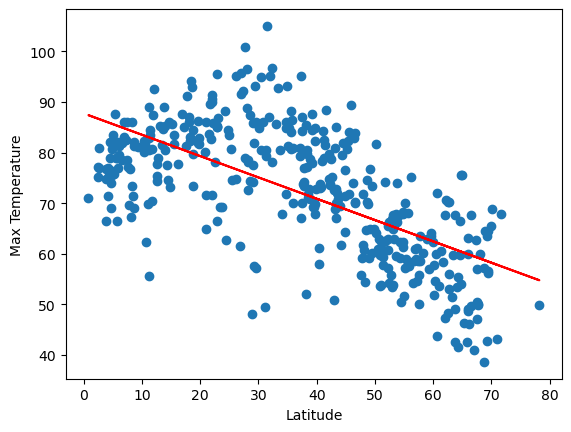

In [16]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,250),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
print(f"The r-value is:{rvalue}")
plt.show()

The r-value is:0.8202135408926065


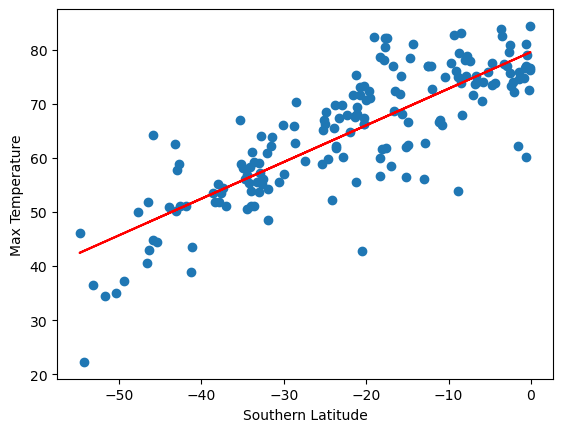

In [17]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,200),fontsize=15,color="red")
plt.xlabel("Southern Latitude")
plt.ylabel("Max Temperature")
print(f"The r-value is:{rvalue}")
plt.show()

**Discussion about the linear relationship:** 
In the Northern Latitude, it appears that temperature decreases the further away to the equator the latidude it.
The Southern latitude has an increase in temperature the closer it gets to the equator. 

### Humidity vs. Latitude Linear Regression Plot

The r-value is:-0.0469041238316142


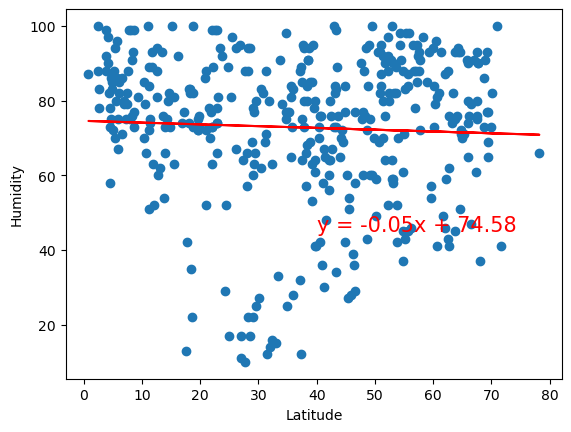

In [18]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,45),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f"The r-value is:{rvalue}")
plt.show()

The r-value is:0.017059841747082184


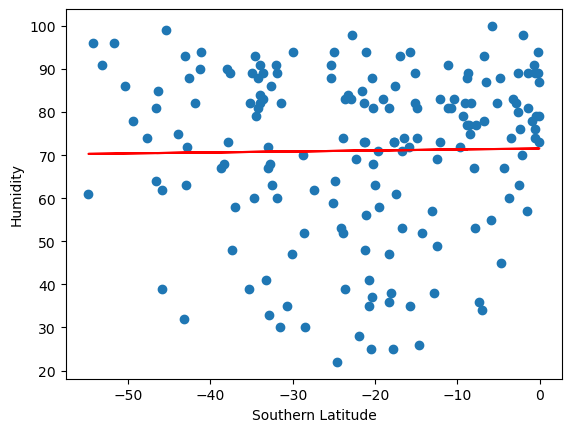

In [24]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,45),fontsize=15,color="red")
plt.xlabel('Southern Latitude')
plt.ylabel('Humidity')
print(f"The r-value is:{rvalue}")
plt.show()

**Discussion about the linear relationship:** 

The humidity in the Northern latitude is slighlty higher than the southern, however it not a significant change. 

### Cloudiness vs. Latitude Linear Regression Plot

The vr-value is -0.1761855309383268


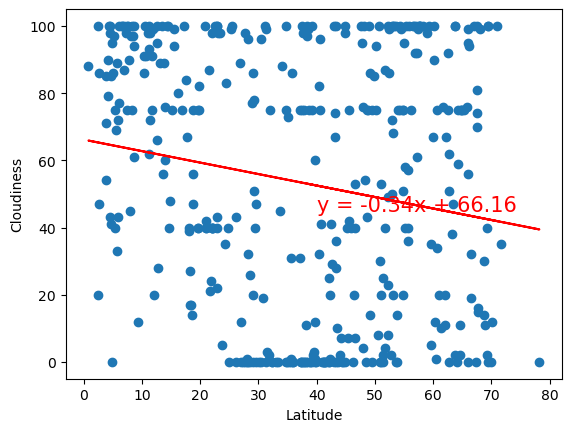

In [20]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,45),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f"The vr-value is {rvalue}")
plt.show()


The vr-value is -0.05910235586699657


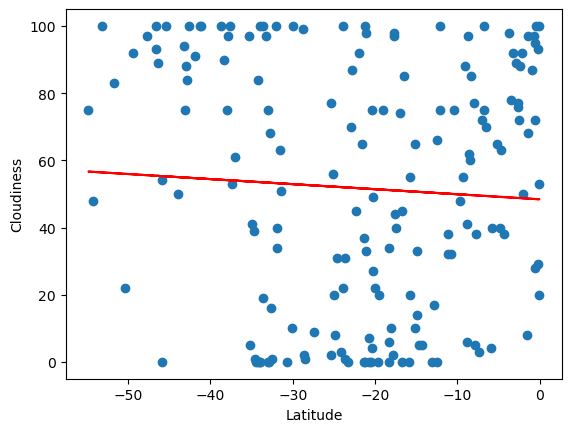

In [21]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,45),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f"The vr-value is {rvalue}")
plt.show()

**Discussion about the linear relationship:** 

The northern hemisphere, is slightly cloudier than the Southern, but the data shows it's not a significant change. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is:-0.10344539768619096


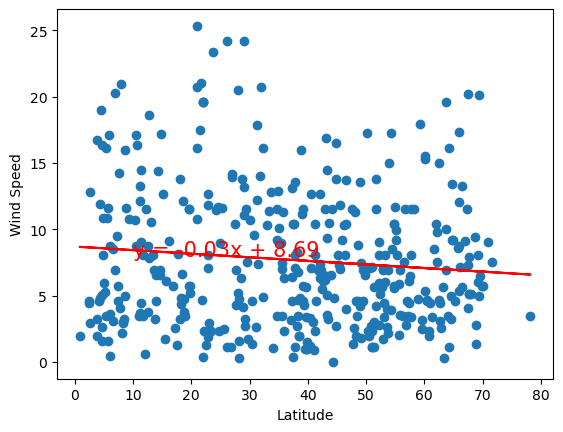

In [22]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,8),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(f"The r-value is:{rvalue}")
plt.show()

The r-value is:-0.1485111875326169


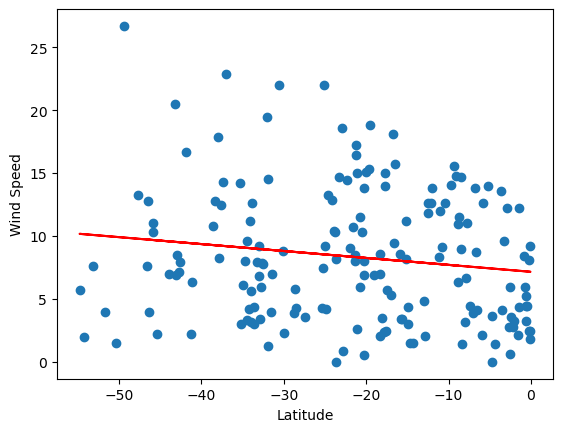

In [23]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,8),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(f"The r-value is:{rvalue}")
plt.show()

**Discussion about the linear relationship:** 
The northern hempisphere has increased wind speeds in comparison to the southern hemisphere. 